### 音声波形の確認

In [5]:
import wave
import numpy
import pylab

def data_form_wav(filename):
    f = wave.open(filename, 'r')
    buf = f.readframes(f.getnframes())
    return numpy.frombuffer(buf, dtype='int16')

if __name__ == '__main__':
    fig, (l, r) = pylab.subplots(ncols=2,  figsize=(15,5))
    l.plot(data_form_wav('do/do3.wav'))
    l.set_title('do')
#     l.set_xlim(15000, 48000)
    r.plot(data_form_wav('re/re3.wav'))
    r.set_title('re')
#     r.set_xlim(15000, 48000)
    fig.show()
#     fig.savefig('do-re.png')
    
    

/Users/hamaguchikazuki/.pyenv/versions/3.6.5/envs/ppgVC/lib/python3.6/site-packages/matplotlib/figure.py:457: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


### メル周波数ケプストラム係数の表示

/Users/hamaguchikazuki/.pyenv/versions/3.6.5/envs/ppgVC/lib/python3.6/site-packages/matplotlib/figure.py:457: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


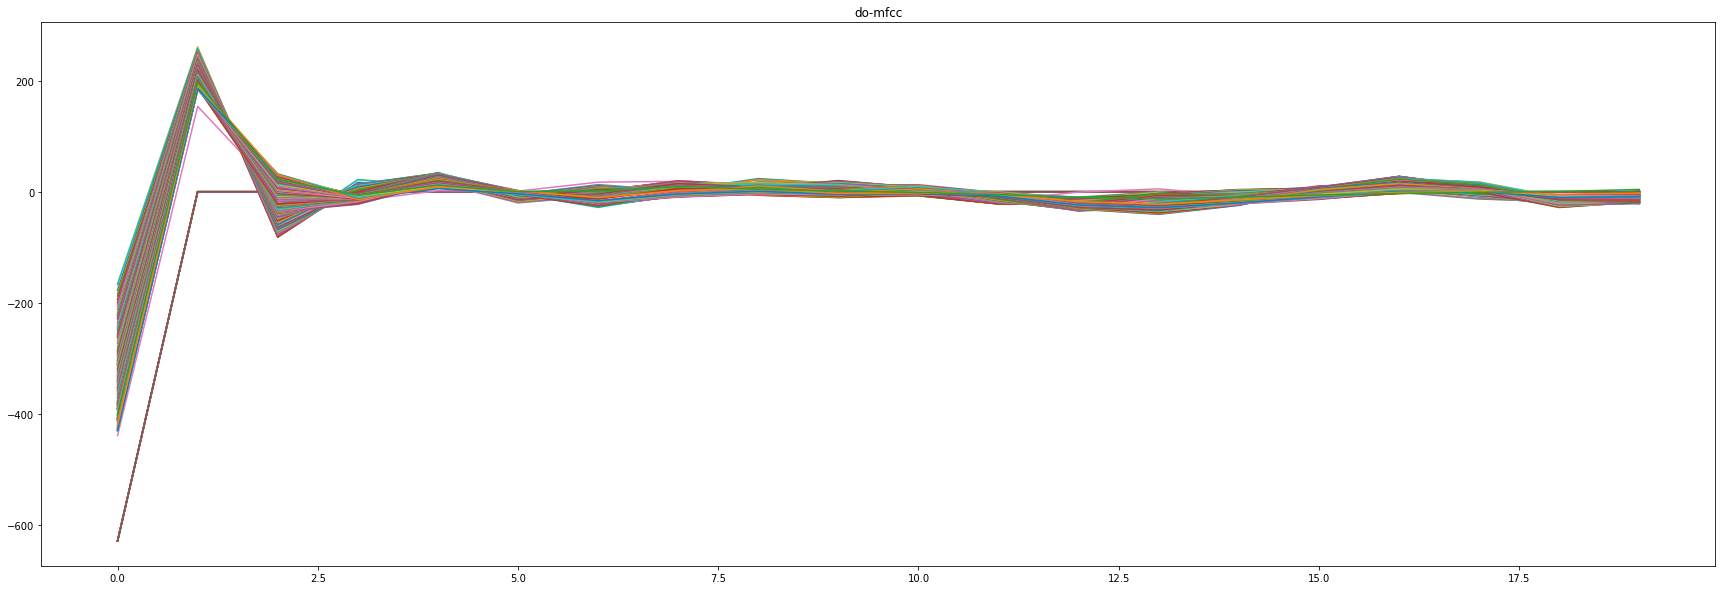

In [59]:
import librosa
import numpy

def get_mfcc(fname):
    y, sr = librosa.load(fname)
    return librosa.feature.mfcc(y, sr)

if __name__ == '__main__':
    do = get_mfcc('do/do3.wav')
    fig, l = pylab.subplots(ncols=1, figsize=(30,10))
    l.plot(do)
    l.set_title('do-mfcc')
#     fig.savefig('do-mfcc.png')
    fig.show()


### 学習用データを用いて学習

In [3]:
import scipy.io.wavfile as wav
import librosa
from sklearn.svm import SVC
import numpy

def get_mfcc(fname):
    y, sr = librosa.load(fname)
    return librosa.feature.mfcc(y, sr)

if __name__  ==  '__main__':

    piano_notes = ['do', 're']
    piano_sounds = list(range(16))

    piano_note_training = []
    piano_sound_training = []

    for piano_note in piano_notes:
        print('Reading data of {}...'.format(piano_note))
        for piano_sound in piano_sounds:
            print('{}/{}{}.wav'.format(piano_note, piano_note, piano_sound))
            
            # get mfcc
            mfcc = get_mfcc('{}/{}{}.wav'.format(piano_note, piano_note, piano_sound))
            piano_sound_training.append(mfcc.T)
            print(len(mfcc.T))
            
            print('\n----- label -----\n')
            label = numpy.full((mfcc.shape[1], ), 
                               piano_notes.index(piano_note), dtype=numpy.int)
            print(label)
            piano_note_training.append(label)
    
    piano_sound_training = numpy.concatenate(piano_sound_training)
    piano_note_training = numpy.concatenate(piano_note_training)
    print('done')

Reading data of do...
do/do0.wav
173

----- label -----

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
do/do1.wav
173

----- label -----

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
do/do2.wav
173

----- label -----

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 

173

----- label -----

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
re/re7.wav
173

----- label -----

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
re/re8.wav
173

----- label -----

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1

### 各メル周波数ケプストラム係数の表示

In [95]:
fig, l = pylab.subplots(ncols=1, figsize=(30,10))
l.plot(piano_sound_training)
l.set_title('piano_sound_training')
# fig.savefig('training.png')
fig.show()

/Users/hamaguchikazuki/.pyenv/versions/3.6.5/envs/ppgVC/lib/python3.6/site-packages/matplotlib/figure.py:457: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


### パラメータチューニング&評価

In [69]:
# そのまま判定
svc = SVC()
svc.fit(piano_sound_training, piano_note_training)
print('Learning Done')

piano_sounds_test = list(range(16,18))
for piano_note in piano_notes:
    for piano_sound in piano_sounds_test:
        print('piano test sound {}{}'.format(piano_note, piano_sound))
        mfcc = get_mfcc('{}/{}{}.wav'.format(piano_note, piano_note,piano_sound))
        prediction = svc.predict(mfcc.T)
        counts = numpy.bincount(prediction) 
        result = piano_notes[numpy.argmax(counts)] # 音程の判定
        original_title = '{}'.format(piano_note)
        print('original note is {}. Prediction of note is {}'.format(original_title, result))

Learning Done
piano test sound do16
original note is do. Prediction of note is do
piano test sound do17
original note is do. Prediction of note is do
piano test sound re16
original note is re. Prediction of note is do
piano test sound re17
original note is re. Prediction of note is do


In [74]:
# C, gammaの値を変更 * 1e-3より正しく分けられている
svc = SVC(gamma = 1e-3)
svc.fit(piano_sound_training, piano_note_training)
print('Learning Done')

piano_sounds_test = list(range(16,18))
for piano_note in piano_notes:
    for piano_sound in piano_sounds_test:
        print('piano test sound {}{}'.format(piano_note, piano_sound))
        mfcc = get_mfcc('{}/{}{}.wav'.format(piano_note, piano_note,piano_sound))
        prediction = svc.predict(mfcc.T)
        counts = numpy.bincount(prediction) 
        result = piano_notes[numpy.argmax(counts)] # 音程の判定
        original_title = '{}'.format(piano_note)
        print('original note is {}. Prediction of note is {}'.format(original_title, result))

Learning Done
piano test sound do16
original note is do. Prediction of note is do
piano test sound do17
original note is do. Prediction of note is do
piano test sound re16
original note is re. Prediction of note is re
piano test sound re17
original note is re. Prediction of note is re


In [7]:
label = numpy.full((mfcc.shape[1], ), 
                               piano_notes.index(piano_note), dtype=numpy.int)